In [1]:
#author:Fairuz Shadmani Shishir
#Date:23.07.2019

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Let's use a simple example to illustrate this concept: Our task is to draw random samples from a geometrically-bounded distribution in form a circle in a cartesian coordinate system with a radius of 2 centered at the coordinates x=4 and y=4.

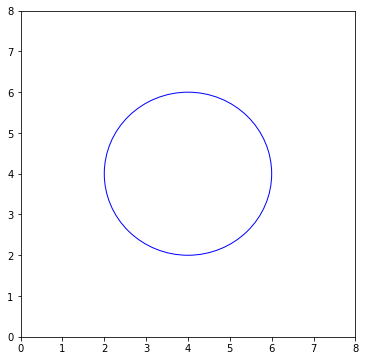

In [6]:
center = (4,4)
radius = 2

def plot_circle(center, radius):
    """ Function to plot a circle. """
    fig = plt.figure(figsize=(6,6))
    circle = plt.Circle(center, radius, fill=False, color='b')
    plt.ylim([0,8])
    plt.xlim([0,8])
    fgca = fig.gca()
    fgca.add_artist(circle)
    return fgca

plot_circle(center, radius)
plt.show()

## Now, we can draw a simple square around the circle that will represent our uniform distribution.

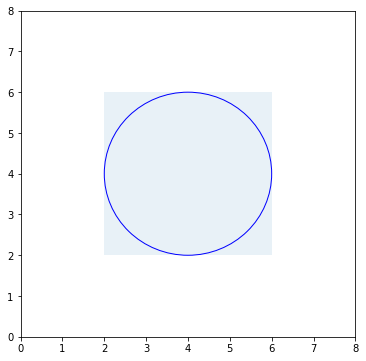

In [7]:
from matplotlib.patches import Rectangle

def plot_square(center, radius):
    """ Function to plot a square. """
    fgca = plot_circle(center, radius)
    fgca.add_patch(Rectangle((center[0] - radius, center[1] - radius), 
                             2*radius, 2*radius, alpha=0.1))
    return fgca
    
plot_square(center, radius)
plt.show()

## Next, we will define a function that generates pseudo-random X and Y coordinates that fall inside the square

In [8]:
import random
random.seed(567)

In [9]:
def gen_points(n, center, radius):
    """ 
    Function that generates 
    n x,y coordinates in a square of length radius*2.
    
    """
    x_coords = []
    y_coords = []
    for i in range(n):
        x_coords.append(random.random()*center[0]+radius)
        y_coords.append(random.random()*center[1]+radius)
    return x_coords, y_coords

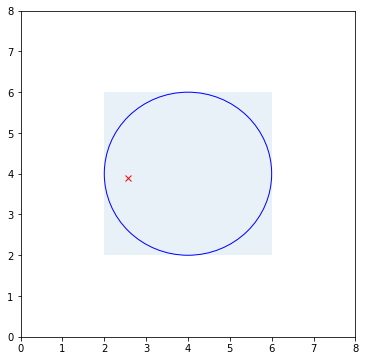

In [10]:
x, y = gen_points(1, center, radius)
fgca = plot_square(center, radius)
fgca.plot(x, y, linestyle="", marker="x", color="red")
plt.show()

## Let us generate 1000 random points and check if our function works correctly

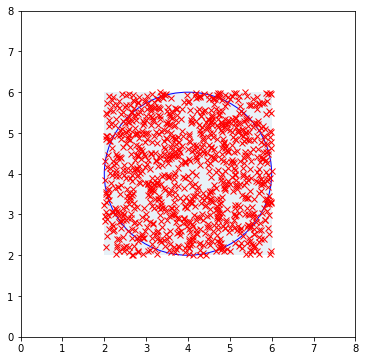

In [11]:
x, y = gen_points(1000, center, radius)
fgca = plot_square(center, radius)
fgca.plot(x, y, linestyle="", marker="x", color="red")
plt.show()

## The plot above looks fine. In the last step, we only need to reject those points lie outside the circle, which is pretty straight forward using a Euclidean distance measure.

In [12]:
def reject(radius, center, x_coords, y_coords):
    """ Returns those coordinates that fall within the circle. """
    x_clean = []
    y_clean = []
    for x,y in zip(x_coords, y_coords):
        if ((x - center[0])**2 + (y-center[1])**2)**0.5 <= radius:
            x_clean.append(x)
            y_clean.append(y)
    return x_clean, y_clean 

## Again, let us do a quick visual check if we correctly removed all points that didn't satisfy the condition |x−y|≤radius.

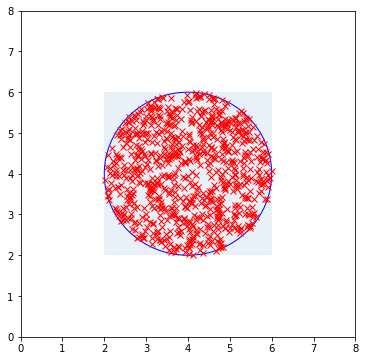

In [13]:
x_clean, y_clean = reject(radius, center, x, y)
fgca = plot_square(center, radius)
fgca.plot(x_clean, y_clean, linestyle="", marker="x", color="red")
plt.show()

In [14]:
def estimate_circle_area(n, center, radius):
    """ Returns the estimated circle area via rejection sampling. """
    rect_area = (2*radius)**2
    x, y = gen_points(n, center, radius)
    x_clean, y_clean = reject(radius, center, x, y)
    est_circle_area = rect_area * (len(x_clean)/len(x))

    return est_circle_area

In [15]:
print('Estimated circle area: %s' %estimate_circle_area(100000, center, radius))

Estimated circle area: 12.56224


In [16]:
from math import pi

print('Circle area using pi: %s' %(pi*radius**2))

Circle area using pi: 12.566370614359172


In [17]:
def approximate_pi(n, center, radius):
    """ Returns an approximation of pi via rejection sampling. """
    circ_area = estimate_circle_area(n, center, radius)
    return circ_area/radius**2

for i in (10, 10**2, 10**4, 10**7):
    pi_est = approximate_pi(i, center, radius)
    print('Pi estimate: %s (n=%s)' %(pi_est, i))

Pi estimate: 1.6 (n=10)
Pi estimate: 3.28 (n=100)
Pi estimate: 3.1496 (n=10000)
Pi estimate: 3.1412652 (n=10000000)
